In [1]:
#references : https://www.youtube.com/watch?v=-QUyD0YFYb0&ab_channel=HDMVision
# https://www.youtube.com/watch?v=kMJDsh0TCik&ab_channel=ManusiaSetengahChiKuadrat

# Read Data

In [14]:
review_nlp = pd.read_csv('./review tokped mentah.csv')
review_nlp.head()

,content,score
0,keren,5
1,sukses untuk GOTO,5
2,Kenapa tidak bisa top up,1
3,"Saya beli hp di sini baru ini begini, reseller...",1
4,good job,5


In [15]:
review_nlp['score'].value_counts()

5    122
1     45
4     13
2     10
3     10
Name: score, dtype: int64

# Labeling

In [16]:
label = []

for index, row in review_nlp.iterrows():
    if row['score'] >=4 :
        label.append(1)
    else : 
        label.append(0)
        
review_nlp['label'] = label
review_nlp = review_nlp.drop(columns=['score'])

review_nlp.head()

,content,label
0,keren,1
1,sukses untuk GOTO,1
2,Kenapa tidak bisa top up,0
3,"Saya beli hp di sini baru ini begini, reseller...",0
4,good job,1


In [17]:
review_nlp['label'].value_counts()

1    135
0     65
Name: label, dtype: int64

# visualisasi text

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

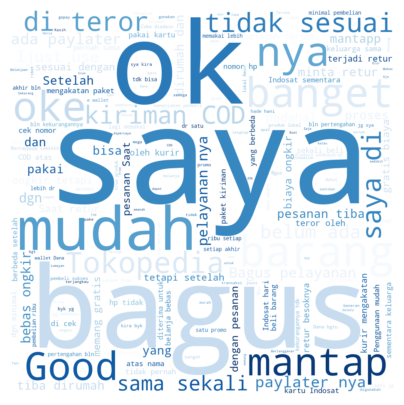

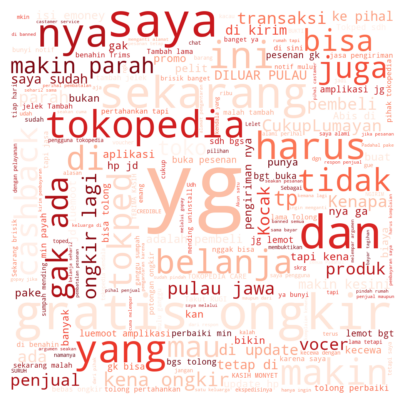

In [21]:
content_1 = review_nlp[review_nlp['label']==1]
content_1 = ' '.join(word for word in content_1['content'])
wcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode= 'RGBA', background_color='white').generate(content_1)
plt.figure(figsize=(5, 5))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()

content_0 = review_nlp[review_nlp['label']==0]
content_0 = ' '.join(word for word in content_0['content'])
wcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode= 'RGBA', background_color='white').generate(content_0)
plt.figure(figsize=(5, 5))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()

# Text Cleansing

In [22]:
def remove_unused(text):
    text = re.sub('[0-9]+', '', text)
    text = re.sub(r'\$\w*', '', text)
    text = re.sub(r'@[\w]*', '', text)
    text = re.sub(r'https?://\S+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = text.replace('\n', ' ')
    text = text.encode('ascii', 'ignore').decode('utf-8')
    text = re.sub(r'[^\x00-\x7f]', r'', text)
    text = re.sub(r'[^\w]', ' ', text)
    space = ['    ', '   ', '  ']
    for i in space:
        text = text.replace(i, ' ')
    text = text.lower().strip()
#     text = text.translate(str.maketrans('', '', string.punctuation))
    return text

In [23]:
review_nlp['clean text'] = review_nlp['content'].apply(lambda x: remove_unused(x))
review_nlp = review_nlp[['clean text', 'label']]
review_nlp

,clean text,label
105,mntap,1
172,proses mudah,1
50,bagus pelayanan nya,1
83,hade hani daden,1
76,mantappppp lekkkkk,1
...,...,...
57,akun affliate diblokir,0
82,saya pengguna tokopedia sudah lama tetapi saya...,0
147,tokopedia gimana sih batalin pesananseenaknya ...,0
40,tokped sdh bgs tolong pertahankan tapi jasa pe...,0


# Stemming

In [24]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
stemmer_e = PorterStemmer()
stemmer = StemmerFactory().create_stemmer()

In [25]:
#stemmer indo
review_nlp['stemmed'] = [stemmer.stem(word) for word in review_nlp['clean text']]

In [26]:
review_nlp.head()

,clean text,label,stemmed
105,mntap,1,mntap
172,proses mudah,1,proses mudah
50,bagus pelayanan nya,1,bagus layan nya
83,hade hani daden,1,hade hani daden
76,mantappppp lekkkkk,1,mantappppp lekkkkk


In [27]:
#stemmer inggris
review_nlp['stemmed'] = [stemmer_e.stem(word) for word in review_nlp['stemmed']]

In [28]:
review_nlp.drop('clean text', axis=1, inplace = True)

In [29]:
review_nlp.head()

,label,stemmed
105,1,mntap
172,1,proses mudah
50,1,bagus layan nya
83,1,hade hani daden
76,1,mantappppp lekkkkk


# Stopword

In [30]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.corpus import stopwords
stopworder = set(stopwords.words('indonesian', 'english'))
stopword = StopWordRemoverFactory().create_stop_word_remover()

In [31]:
#contoh
tes ='jika novel berteriak minta keadilan bagaimana'
stopworded = stopword.remove(tes)
print(stopworded)

novel berteriak keadilan


In [32]:
review_nlp['stopworded'] = [stopword.remove(word) for word in review_nlp['stemmed']]

In [33]:
review_nlp.head()

,label,stemmed,stopworded
105,1,mntap,mntap
172,1,proses mudah,proses mudah
50,1,bagus layan nya,bagus layan
83,1,hade hani daden,hade hani daden
76,1,mantappppp lekkkkk,mantappppp lekkkkk


In [34]:
review_nlp['stopworded'] = [word for word in review_nlp['stopworded'] if word not in stopworder]

In [35]:
review_nlp.drop('stemmed', axis=1, inplace = True)

In [36]:
review_nlp =review_nlp[['stopworded', 'label']]

In [37]:
review_nlp

,stopworded,label
105,mntap,1
172,proses mudah,1
50,bagus layan,1
83,hade hani daden,1
76,mantappppp lekkkkk,1
...,...,...
57,akun affliate blokir,0
82,tokopedia kecewa layan tokopedia kendala alami...,0
147,tokopedia gimana sih batalin pesananseenaknya ...,0
40,tokped sdh bgs tolong tahan jasa kirim jelek t...,0


# Feature Enginering TF-IDF

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [51]:
vectorizer_tfidf = TfidfVectorizer()

In [59]:
vectorized_tfidf = vectorizer_tfidf.fit_transform(review_nlp['stopworded'])

In [60]:
vectorized_tfidf.shape

(260, 461)

In [61]:
#contoh feature
print(vectorized_tfidf.todense()[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.18683849 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.23486643
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.26332412 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.25197678 0.         0.         0.
  0.         0.         0.      

In [56]:
vectorizer_tfidf.get_feature_names()

['abis',
 'admin',
 'adminya',
 'affliate',
 'aja',
 'aju',
 'aktif',
 'akun',
 'alamat',
 'alami',
 'alas',
 'alih',
 'ama',
 'aman',
 'amanah',
 'amin',
 'amplikasi',
 'apk',
 'aplikasi',
 'app',
 'argumen',
 'asa',
 'asik',
 'asuransi',
 'atur',
 'bagu',
 'bagus',
 'bales',
 'banding',
 'banget',
 'bangkrut',
 'banned',
 'bantu',
 'barang',
 'batal',
 'batalin',
 'bayar',
 'bebas',
 'beda',
 'begok',
 'belah',
 'belanja',
 'belanjaa',
 'beli',
 'belu',
 'benahin',
 'beneran',
 'beradsss',
 'berkah',
 'besok',
 'betah',
 'bgs',
 'bgt',
 'bgtu',
 'bgu',
 'biar',
 'biaya',
 'bijak',
 'bikin',
 'bilang',
 'bingung',
 'bintang',
 'biss',
 'bkn',
 'bln',
 'blokir',
 'blom',
 'bnget',
 'bos',
 'brisik',
 'brp',
 'brpa',
 'bs',
 'bt',
 'bual',
 'buka',
 'bukti',
 'bunyi',
 'buruk',
 'byk',
 'call',
 'cantik',
 'care',
 'cari',
 'cashback',
 'castamer',
 'cek',
 'center',
 'cepat',
 'cepet',
 'cewek',
 'chat',
 'coba',
 'cod',
 'complain',
 'contoh',
 'costumer',
 'cred',
 'credible',
 'cs',

# Feature Enginering Bag Of Word

In [57]:
from sklearn.feature_extraction.text import CountVectorizer

In [62]:
vectorizer_bow= CountVectorizer()
vectorized_bow = vectorizer_bow.fit_transform(review_nlp['stopworded'])

In [63]:
vectorized_bow.shape

(260, 461)

In [65]:
#contoh feature
print(vectorized_bow.todense()[10])

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0
  0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0]]


In [67]:
vectorizer_bow.get_feature_names()

['abis',
 'admin',
 'adminya',
 'affliate',
 'aja',
 'aju',
 'aktif',
 'akun',
 'alamat',
 'alami',
 'alas',
 'alih',
 'ama',
 'aman',
 'amanah',
 'amin',
 'amplikasi',
 'apk',
 'aplikasi',
 'app',
 'argumen',
 'asa',
 'asik',
 'asuransi',
 'atur',
 'bagu',
 'bagus',
 'bales',
 'banding',
 'banget',
 'bangkrut',
 'banned',
 'bantu',
 'barang',
 'batal',
 'batalin',
 'bayar',
 'bebas',
 'beda',
 'begok',
 'belah',
 'belanja',
 'belanjaa',
 'beli',
 'belu',
 'benahin',
 'beneran',
 'beradsss',
 'berkah',
 'besok',
 'betah',
 'bgs',
 'bgt',
 'bgtu',
 'bgu',
 'biar',
 'biaya',
 'bijak',
 'bikin',
 'bilang',
 'bingung',
 'bintang',
 'biss',
 'bkn',
 'bln',
 'blokir',
 'blom',
 'bnget',
 'bos',
 'brisik',
 'brp',
 'brpa',
 'bs',
 'bt',
 'bual',
 'buka',
 'bukti',
 'bunyi',
 'buruk',
 'byk',
 'call',
 'cantik',
 'care',
 'cari',
 'cashback',
 'castamer',
 'cek',
 'center',
 'cepat',
 'cepet',
 'cewek',
 'chat',
 'coba',
 'cod',
 'complain',
 'contoh',
 'costumer',
 'cred',
 'credible',
 'cs',